In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from ma3 import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [14]:
df_dict = {}
# candidate = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
candidate = ['ADA','ETC','BTC','ETH','BCH','AAVE','AVAX','MATIC','XLM','MKR','APT','EGLD','GRT','ALGO']
for coin in candidate:
    df_dict[coin] = get_data(coin)

In [15]:
df_dict['SOL'] = get_data('SOL')

Start                               2022-01-01 00:00:00
End                                 2023-11-07 00:00:00
Period                                675 days 01:00:00
Start Value                                     10000.0
Min Value                                     9997.0009
Max Value                                  37620.655012
End Value                                  36010.514118
Total Return [%]                             260.105141
Benchmark Return [%]                         -75.533643
Total Time Exposure [%]                       29.146349
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              16.283105
Max Drawdown Duration                 121 days 15:00:00
Total Orders                                        160
Total Fees Paid                              493.800038
Total Trades                                         82
Win Rate [%]                                  42.682927
Best Trade [%]                                46

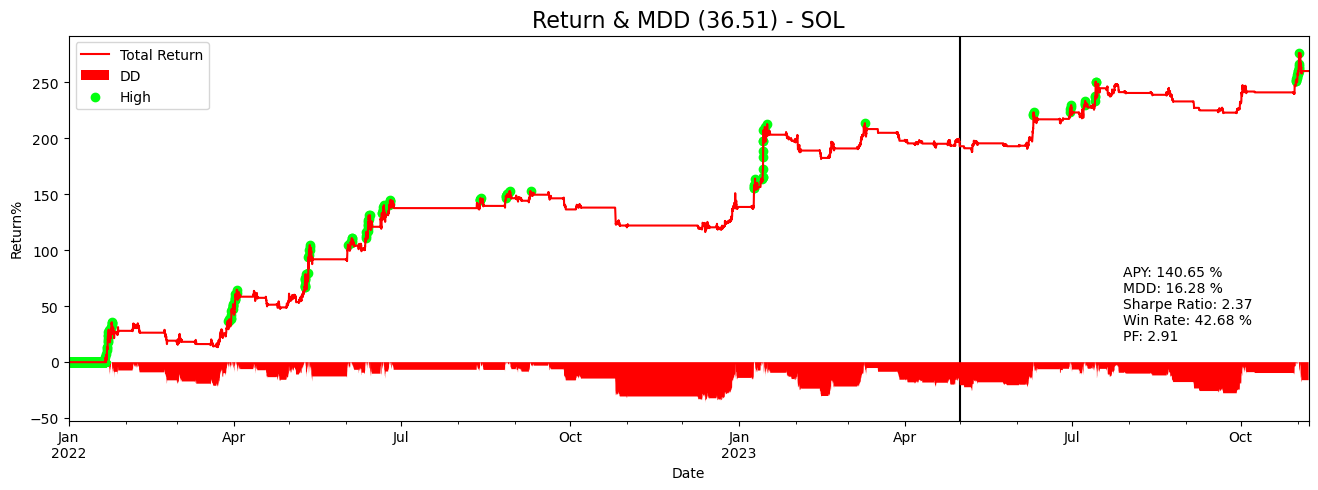

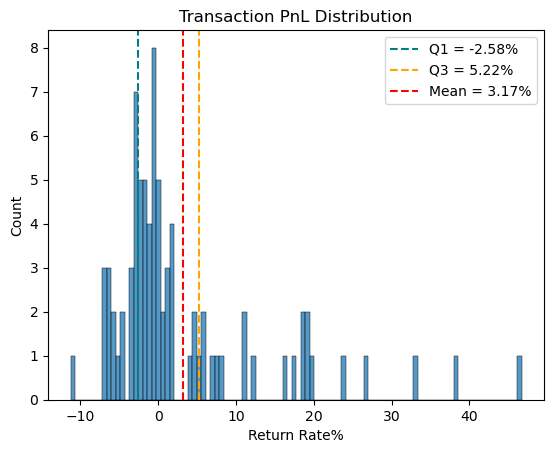

In [24]:
start = '2022-01-01'
sep = ''
end = ''

# params = {'short_window_l': 20, 'middle_window_l': 58, 'long_window_l': 120, 'short_window_s': 28, 'middle_window_s': 62, 'long_window_s': 120, 'upper_bound': 90}

params = {"short_window_l": 24.0,
        "middle_window_l": 56.0,
        "long_window_l": 140.0,
        "short_window_s": 24.0,
        "middle_window_s": 64.0,
        "long_window_s": 132.0,
        'upper_bound': 85}

side = 'both'
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])
analyze.plot_ret_dist(trades)

<AxesSubplot:xlabel='Entry Index'>

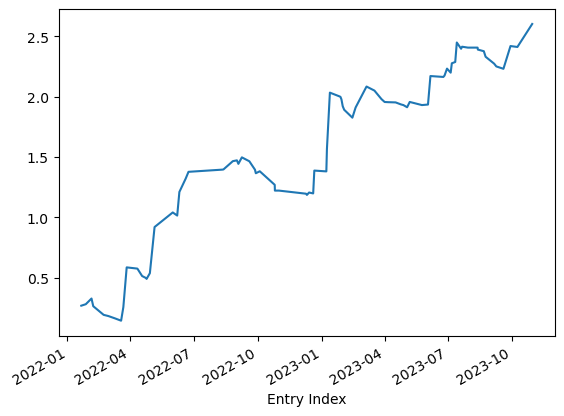

In [25]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

In [2]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

params={"short_window_l": [20,40,8],
        "middle_window_l": [50,80,8],
        "long_window_l": [120,150,8],
        "short_window_s": [20,40,8],
        "middle_window_s": [50,80,6],
        "long_window_s": [120,150,8],
        'upper_bound':[85,95,5]
    }
    
config = {'freq':'1h','fee': 0.0003}
# symbol_list = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
symbol_list = ['SOL']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
# trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)
# all_params


======================= SOL BOTH Optimize Test =======================
Optimization trails: 5760


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Pl

KeyboardInterrupt: 

: 